## Part 1: Monolingual embeddings

In [39]:
import embedding
import similarity
import visualize
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Functions for embedding visualization
def word2array(words, word_list, array):
    fp = open("test.txt", "w", encoding="utf-8")
    out = np.zeros((len(words), 300))
    for (i, word) in enumerate(words):
        try:
            row = word_list.index(word)
            out[i,:] = array[row,:]
        except:
            print(word, "is not in list")
    fp.close()
    return out

def perform_pca(array, n_components):
    # For the purposes of this lab, n_components will always be 2.
    pca = PCA(n_components=n_components)
    pc = pca.fit_transform(array)
    return pc

def plot(pca_first, pca_second, filename='plot.png'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(pca_first[:,0], pca_first[:,1], c='r', s=50)
    ax.scatter(pca_second[:,0], pca_second[:,1], c='b', s=50)
    plt.title("sino(red) vs western(blue) origin")

In [19]:
# Chinese data
word_list = embedding.load_word_list("data/zh.300.txt")
vectors = embedding.load_vectors_array("data/zh.300.npy")

In [18]:
# Japanese data
ja_word_list = embedding.load_word_list("data/ja.300.txt")
ja_vectors = embedding.load_vectors_array("data/ja.300.npy")

MemoryError: Unable to allocate 4.47 GiB for an array with shape (600000000,) and data type float64

In [14]:
zh_fp1 = open("ch_chinese.txt", "r", encoding="utf-8")
zh_fp2 = open("ch_loanwords.txt", "r", encoding="utf-8")
zh_first_words = zh_fp1.read().split()
zh_second_words = zh_fp2.read().split()

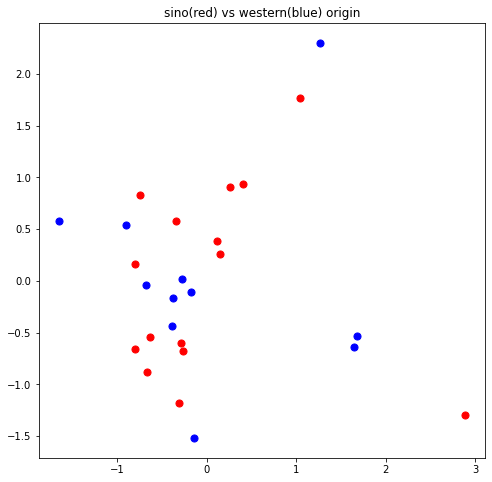

In [15]:
# Plotting Chinese Words
zh_first_vec = word2array(zh_first_words, word_list, vectors)
zh_second_vec = word2array(zh_second_words, word_list, vectors)
zh_first_pca = perform_pca(zh_first_vec, 2)
zh_second_pca = perform_pca(zh_second_vec, 2)
plot(zh_first_pca, zh_second_pca)

In [16]:
# Japanese data
ja_fp1 = open("ja_chinese.txt", "r", encoding="utf-8")
ja_fp2 = open("ja_loanwords.txt", "r", encoding="utf-8")
ja_first_words = ja_fp1.read().split()
ja_second_words = ja_fp2.read().split()

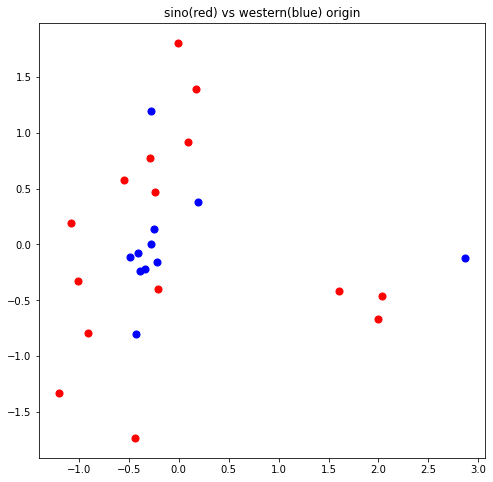

In [17]:
# Plotting Chinese Words
ja_first_vec = word2array(ja_first_words, ja_word_list, ja_vectors)
ja_second_vec = word2array(ja_second_words, ja_word_list, ja_vectors)
ja_first_pca = perform_pca(ja_first_vec, 2)
ja_second_pca = perform_pca(ja_second_vec, 2)
plot(ja_first_pca, ja_second_pca)

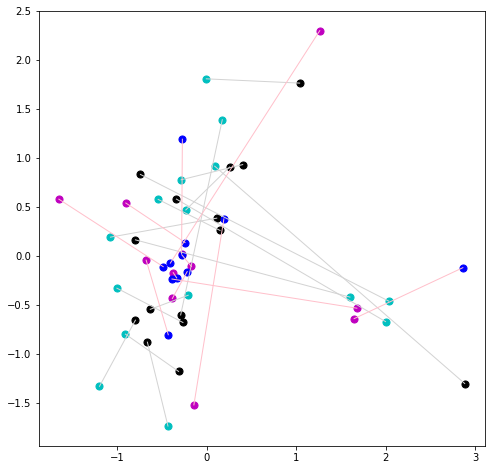

In [23]:
# Plotting words pairwise
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(zh_first_pca[:,0], zh_first_pca[:,1], c='k', s=50)
ax.scatter(zh_second_pca[:,0], zh_second_pca[:,1], c='m', s=50)
ax.scatter(ja_first_pca[:,0], ja_first_pca[:,1], c='c', s=50)
ax.scatter(ja_second_pca[:,0], ja_second_pca[:,1], c='b', s=50)
for i in range(len(zh_first_pca)):
    (x1,y1) = zh_first_pca[i]
    (x2,y2) = ja_first_pca[i]
    ax.plot((x1, x2), (y1, y2), linewidth=1, color="lightgray")
for i in range(len(zh_second_pca)):
    (x1,y1) = zh_second_pca[i]
    (x2,y2) = ja_second_pca[i]
    ax.plot((x1, x2), (y1, y2), linewidth=1, color="pink")

In [ ]:
# Compare w/ neighbors

## Part 2: Aligned Vectors

In [6]:
# Chinese aligned data
chinese_aligned_word_list = embedding.load_word_list("data/zh.align.txt")
chinese_aligned_vectors = embedding.load_vectors_array("data/zh.align.npy")

In [7]:
len(chinese_aligned_word_list)
chinese_aligned_vectors.shape

(332647, 300)

In [8]:
# Korean aligned data
korean_aligned_word_list = embedding.load_word_list("data/ko.align.txt")
korean_aligned_vectors = embedding.load_vectors_array("data/ko.align.npy")

In [10]:
len(korean_aligned_word_list)
korean_aligned_vectors.shape

(879129, 300)

In [11]:
# cutting off the lowest 25%
chinese_aligned_word_list = chinese_aligned_word_list[:int(0.75 * len(chinese_aligned_word_list))]
chinese_aligned_vectors = chinese_aligned_vectors[:int(0.75 * chinese_aligned_vectors.shape[0]),:]
korean_aligned_word_list = korean_aligned_word_list[:int(0.75 * len(korean_aligned_word_list))]
korean_aligned_vectors = korean_aligned_vectors[:int(0.75 * korean_aligned_vectors.shape[0]),:]

In [12]:
print(len(chinese_aligned_word_list))
print(chinese_aligned_vectors.shape)
print(len(korean_aligned_word_list))
print(korean_aligned_vectors.shape)

249476
(249485, 300)
659341
(659346, 300)


In [13]:
def top_n_neighbors(word, word_list, vectors, n):
    vec = embedding.get_vec(word, word_list, vectors)
    pairs = similarity.closest_vectors(vec, word_list, vectors, n)
    return pairs

In [27]:
top_n_neighbors('三月', chinese_aligned_word_list, chinese_aligned_vectors, 10)

[(1.0000000000000007, '三月'),
 (0.8287541132353583, '恒'),
 (0.7687692872201648, 'は'),
 (0.7472630527867824, '明白'),
 (0.7393927177109828, 'ft'),
 (0.7267216327886463, '合浦'),
 (0.7198535253243099, '殲'),
 (0.7084211920171769, '傳道'),
 (0.7079370467133892, 'defends'),
 (0.6894874732581726, '狼藉')]

## Visualization: Word-Pair Relations

In [62]:
def extract_words(left_vectors, right_vectors, left_word_list, right_word_list, relations):
    n = len(relations)
    rel = []
    for i in range(n):
        if relations[i][0] in left_word_list and relations[i][1] in right_word_list:
            rel.append(relations[i])
    m = len(rel)
    vec0 = np.zeros((m, vectors.shape[1]))
    vec1 = np.zeros((m, vectors.shape[1]))
    for i in range(m):
        vec0[i,:] = embedding.get_vec(rel[i][0], left_word_list, left_vectors)
        vec1[i,:] = embedding.get_vec(rel[i][1], right_word_list, right_vectors)
    return vec0, vec1, rel

def plot_relations(pca_first, pca_second, pca_relations, filename='plot.png'):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(pca_first[:,0], pca_first[:,1], c='r', s=50)
    ax.scatter(pca_second[:,0], pca_second[:,1], c='b', s=50)
    for i in range(len(pca_first)):
        (x,y) = pca_first[i]
        plt.annotate(pca_relations[i][0], xy=(x,y), color="black")
        (x,y) = pca_second[i]
        plt.annotate(pca_relations[i][1], xy=(x,y), color="black")
    for i in range(len(pca_first)):
        (x1,y1) = pca_first[i]
        (x2,y2) = pca_second[i]
        ax.plot((x1, x2), (y1, y2), linewidth=1, color="lightgray")
    plt.savefig(filename)

In [60]:
relations_fp = open("translations.txt", "r", encoding="utf-8")
relations = visualize.read_relations(relations_fp)
relations_fp.close()
chinese_vec, korean_vec, rel = extract_words(chinese_aligned_vectors, korean_aligned_vectors, chinese_aligned_word_list, korean_aligned_word_list, relations)
array = np.vstack((chinese_vec, korean_vec))
pca_vectors = perform_pca(array, 2)
pca_first = pca_vectors[:len(rel)]
pca_second = pca_vectors[len(rel):]

In [63]:
plot_relations(pca_first, pca_second, rel)

In [41]:
relations_fp.close()